## Linear Regression

In this section we will implement a linear regression model trainable with SGD using numpy. Here are the objectives:

1. Implement a simple forward model: $y = W x + b$

1. build a `predict` function which returns the predicted regression value given an input $x$

1. build an `accuracy` function for a batch of inputs $X$ and the corresponding expected outputs $y_{true}$ (for regression we typically use Mean Squared Error (MSE) as metric)

1. build a `grad` function which computes the gradients for an $x$ and its corresponding expected output $y_{true}$ ; check that the gradients are well defined

1. build a `train` function which uses the `grad` function output to update $W$ and $b$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

import numpy as np
import random 

np.random.seed(0)

In [2]:
# our toy data for this task
obs  = 20
x    = np.random.uniform(0, 10, size=obs)
temp = 1.3*x + 15 + np.random.normal(0, 1, size=obs)

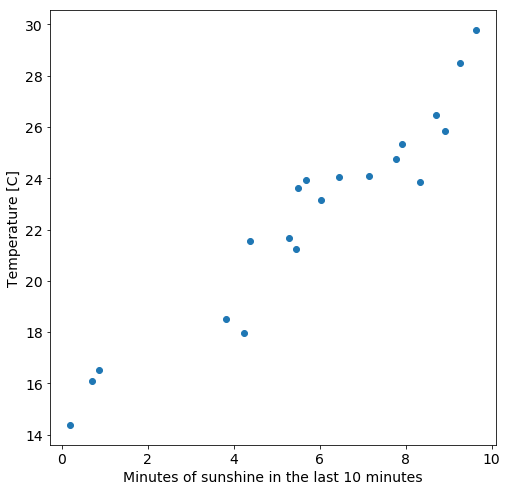

In [3]:
plt.plot(x, temp, 'o')
plt.xlabel("Minutes of sunshine in the last 10 minutes")
plt.ylabel("Temperature [C]");

In [4]:
class LinearRegression():
    def __init__(self):
        self.W = np.random.uniform(high=0.5, low=-0.5)
        self.b = np.random.uniform(high=0.5, low=-0.5)
    
    def predict(self, X):
        # TODO: for each sample in X return the predicted value, X is a vector!
        # Note: through out the week "TODO:" means something for you to do, and
        # `return None` or `return blah` means the function should return something
        # the None is just a placeholder
        y_pred = X * self.W + self.b
        return y_pred
    
    def grad_loss(self, x, y):
        # TODO: compute gradient with respect to W and b for one sample x
        # and the true value y_true
        grad_W = -2 * ( y - self.predict(x) ) * x
        grad_b = -2 * ( y - self.predict(x) )   
        grads  = {"W": grad_W, "b": grad_b}
        return grads
    
    def train(self, x, y, learning_rate):
        # TODO: compute one step of the gradient descent update, update W and b
        grads  = self.grad_loss(x, y)
        self.W = self.W - learning_rate * grads['W']
        self.b = self.b - learning_rate * grads['b']
        
    def loss(self, x, y):
        # TODO: compute the loss for the sample x with true value y
        loss = ( y - self.predict(x) )**2
        return None

    def accuracy(self, X, y):
        # TODO: compute accuracy for samples X with true values y
        mse = np.mean( ( y - self.predict(X) )**2 )
        return mse

Questions:

* how do you know that you trained for enough epochs?
* visualise how the loss changes over the epochs
* are more epochs always better? How could you show this?
* change the setup to use stochastic gradient descent
* (bonus) visualise the values of W and b over the epochs
* (bonus) can you see a difference for the paths of W and b between SGD and normal GD?

In [5]:
# minimise the loss function using Batch Gradient Descent
lr = LinearRegression()
#print('Initial value of W: %.4f and b: %.4f' % (lr.W, lr.b))

# set storage vectors for output
mse = []
W_hat = []
b_hat = []

learning_rate = 0.01
train_acc_0 = lr.accuracy(x, temp)
print("Initial: train accuracy: %0.3f" % (train_acc_0), end=' ')
print('Initial values of W: %.4f and b: %.4f' % (lr.W, lr.b), end='\n')

W_hat.append( lr.W )
b_hat.append( lr.b )

mse.append( train_acc_0 )

# set max number of epochs
epoch_max = 200

for j in range(epoch_max):
    for i, (x_, y_) in enumerate(zip(x, temp)):
        lr.train(x_, y_, learning_rate)
        train_acc = lr.accuracy(x, temp)
        #print("Update: train accuracy: %0.3f" % (train_acc), end=' ')
        #print('value of W: %.4f and b: %.4f' % (lr.W, lr.b))
        #collect MSE, W, b at the end of each epoch
        if not (i+1) % (obs):
            #print( i )
            mse.append( train_acc )
            W_hat.append( lr.W )
            b_hat.append( lr.b )

print("Ultimate: train accuracy: %0.3f" % (mse[-1]), end=' ')  
print('Ultimate values of W: %.4f and b: %.4f' % (lr.W, lr.b), end='\n')
#mse   
#W_hat
#b_hat

Initial: train accuracy: 471.861 Initial values of W: 0.1668 and b: 0.1706
Ultimate: train accuracy: 1.399 Ultimate values of W: 1.3875 and b: 14.2591


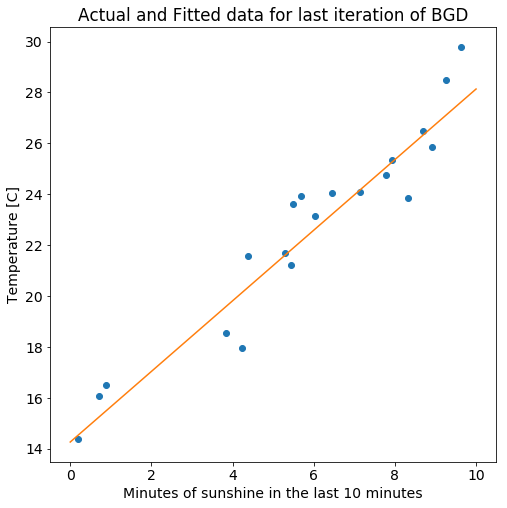

In [6]:
line = np.linspace(0, 10, 100)
plt.plot(x, temp, 'o')
plt.plot(line, lr.predict(line));
plt.xlabel("Minutes of sunshine in the last 10 minutes")
plt.ylabel("Temperature [C]");
plt.title('Actual and Fitted data for last iteration of BGD')

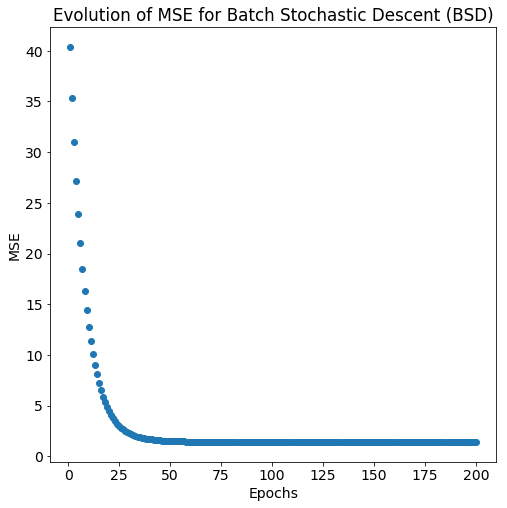

In [7]:
epoch = range( len(mse) )
plt.plot(epoch[1:], mse[1:], 'o')
plt.ylabel("MSE");
plt.xlabel("Epochs");
plt.title('Evolution of MSE for Batch Stochastic Descent (BSD)')
None

In [8]:
# do SGD
W_hat_sgd = []
b_hat_sgd = []
mse_sgd = []

lr_sgd = LinearRegression()
print('initial value of W: %.4f and b: %.4f' % (lr_sgd.W, lr_sgd.b))

W_hat_sgd.append( lr_sgd.W )
b_hat_sgd.append( lr_sgd.b )

learning_rate = 0.01
train_acc_0 = lr_sgd.accuracy(x, temp)
print("Initial: train accuracy: %0.3f" % (train_acc_0), end=' ')
print('initial value of W: %.4f and b: %.4f' % (lr_sgd.W, lr_sgd.b), end='\n')

mse_sgd.append( train_acc_0 )

K = 7#number of observations stochastically selected

for j in range(epoch_max):
    indices = random.sample(range(obs), K)
    count   = 0
    for i, (x_, y_) in enumerate(zip(x, temp)): # Train for one epoch
        #print(i)
        #randomly select observations  for parameter updates
        if i in indices:
            #print(i)
            count += 1
            #print('count: %i' % count )
            lr_sgd.train(x_, y_, learning_rate)
            train_acc = lr_sgd.accuracy(x, temp)
            #print("Update: train accuracy: %0.3f" % (train_acc), end=' ')
            #print('value of W: %.4f and b: %.4f' % (lr_sgd.W, lr_sgd.b))
            #collect MSE for the last observation in each epoch
            if not count % K:
                #print( count )
                mse_sgd.append( train_acc )
                W_hat_sgd.append( lr_sgd.W )
                b_hat_sgd.append( lr_sgd.b )
#mse_sgd        

initial value of W: -0.2896 and b: -0.3711
Initial: train accuracy: 629.130 initial value of W: -0.2896 and b: -0.3711


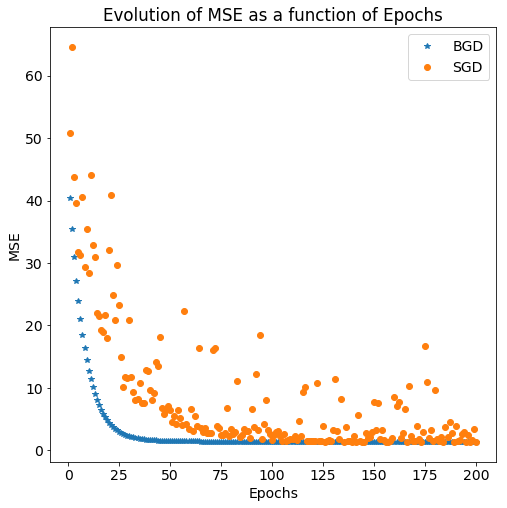

In [9]:
epoch = range( len(mse_sgd) )
plt.plot(epoch[1:], mse[1:], '*', label='BGD')
plt.plot(epoch[1:], mse_sgd[1:], 'o', label='SGD')
plt.ylabel("MSE");
plt.xlabel("Epochs");
plt.title('Evolution of MSE as a function of Epochs')
plt.legend()
None

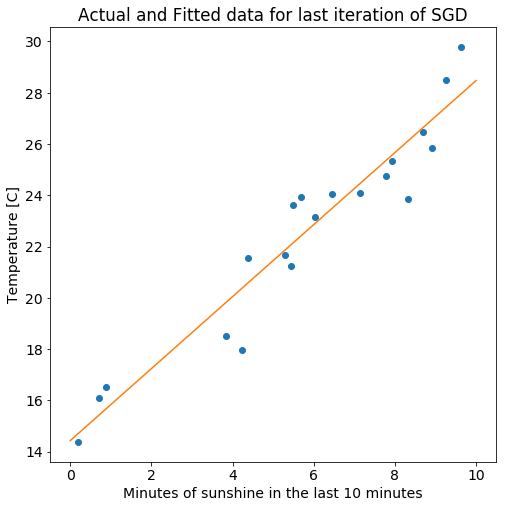

In [10]:
line = np.linspace(0, 10, 100)
plt.plot(x, temp, 'o')
plt.plot(line, lr_sgd.predict(line));
plt.title('Actual and Fitted data for last iteration of SGD')
plt.xlabel("Minutes of sunshine in the last 10 minutes")
plt.ylabel("Temperature [C]");
None

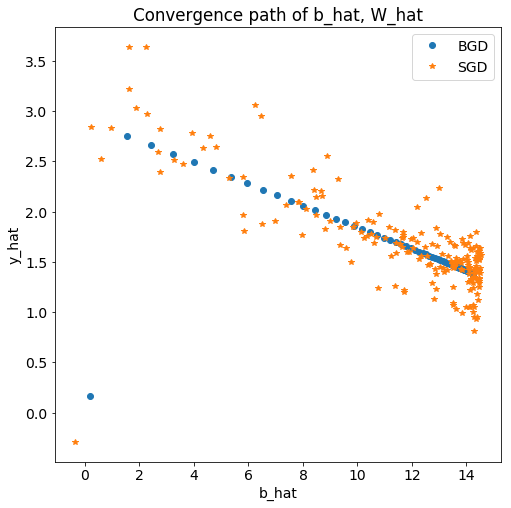

In [11]:
#plot convergence path: Batch Gradient Descent vs Stochastic Gradient Descent
plt.plot( b_hat    , W_hat    , 'o', label = 'BGD')
plt.plot( b_hat_sgd, W_hat_sgd, '*', label = 'SGD')
plt.xlabel( 'b_hat' )
plt.ylabel( 'y_hat' )
plt.title('Convergence path of b_hat, W_hat')
plt.legend()
None